# Clock Jitter Simulation

This script simulates the effect of clock jitter on a digital-to-analog converter (DAC) by generating a sinusoidal test signal with time variations. 
Clock jitter introduces random deviations in the sampling times, which can cause distortions in the frequency spectrum of the signal. 

In [71]:
import numpy as np
import matplotlib.pyplot as plt

First enter the Frequency to be analyzed and the jitter which will be applied randomly to the signal

In [72]:
sampling_frequency = 44100

test_freq = 20000  # Hz
jitter = 100  # ps

duration = 1/test_freq * 1000 # 1000 samples


Now the test signal will be generated.

1. Generate x-axis (time)
2. Generate random jitter values (gaussian) which than can be added to the x-axis

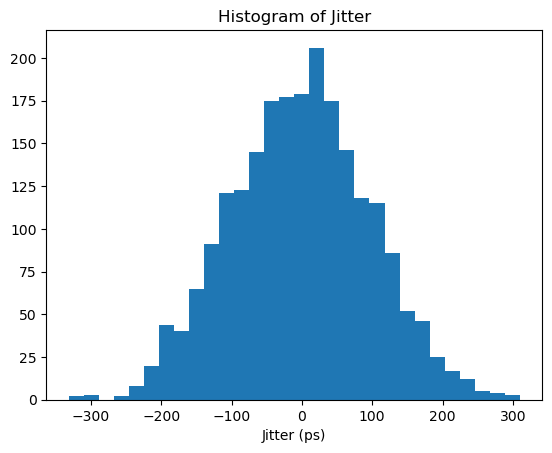

In [73]:
axis_x = np.arange(0, duration, 1/sampling_frequency) # time axis

jitter_s = jitter * 1e-12
jitter_overlay = np.random.normal(0, jitter_s, len(axis_x))

jitter_overlay_ps = jitter_overlay * 1e12
plt.hist(jitter_overlay_ps, bins=30)
plt.xlabel('Jitter (ps)')
plt.title('Histogram of Jitter')
plt.show()

Add the jitter to the non jittered axis_x

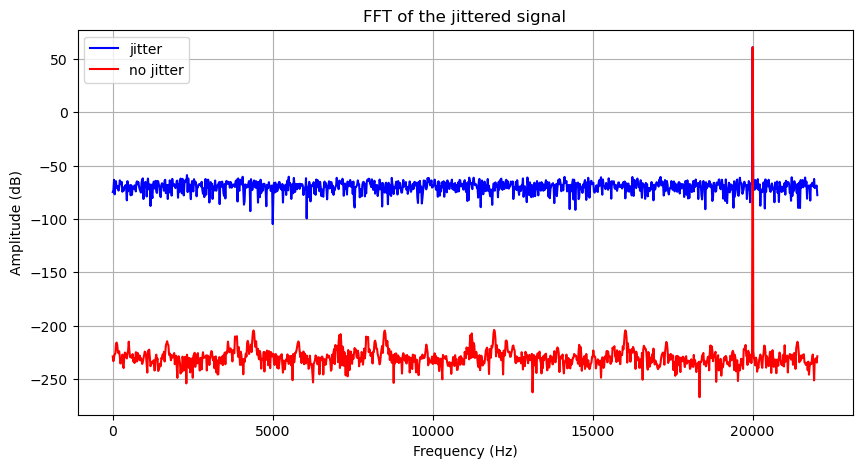

In [74]:
axis_x_jitter = axis_x + jitter_overlay
axis_y = np.sin(2 * np.pi * test_freq * axis_x)

axis_y_jitter = np.sin(2 * np.pi * test_freq * axis_x_jitter)

N = len(axis_y)
fft_y_normal = np.fft.fft(axis_y)
fft_y_jitter = np.fft.fft(axis_y_jitter)

freqs = np.fft.fftfreq(N, 1/sampling_frequency)
    
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 20 * np.log10(np.abs(fft_y_jitter[:N//2])), label="jitter",color='blue')
plt.plot(freqs[:N//2], 20 * np.log10(np.abs(fft_y_normal[:N//2])), label="no jitter",color='red')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.title("FFT of the jittered signal")
plt.legend()
plt.grid()
plt.show()